# 决策树 

In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import sklearn.datasets

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
cancer=sklearn.datasets.load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],
                                              stratify=cancer['target'],random_state=0)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('train:{}'.format(tree.score(X_train,y_train)))
print('test :{}'.format(tree.score(X_test,y_test)))

train:1.0
test :0.9020979020979021


## 预剪枝

In [4]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print('train:{}'.format(tree.score(X_train,y_train)))
print('test :{}'.format(tree.score(X_test,y_test)))

train:0.9859154929577465
test :0.9090909090909091


In [5]:
from sklearn.tree import export_graphviz
#导出树
export_graphviz(tree,out_file='C:/Users/bangsun/Desktop/tree.dot',
                class_names=["malignant","benign"],feature_names=cancer['feature_names'],
               impurity=False,filled=True)

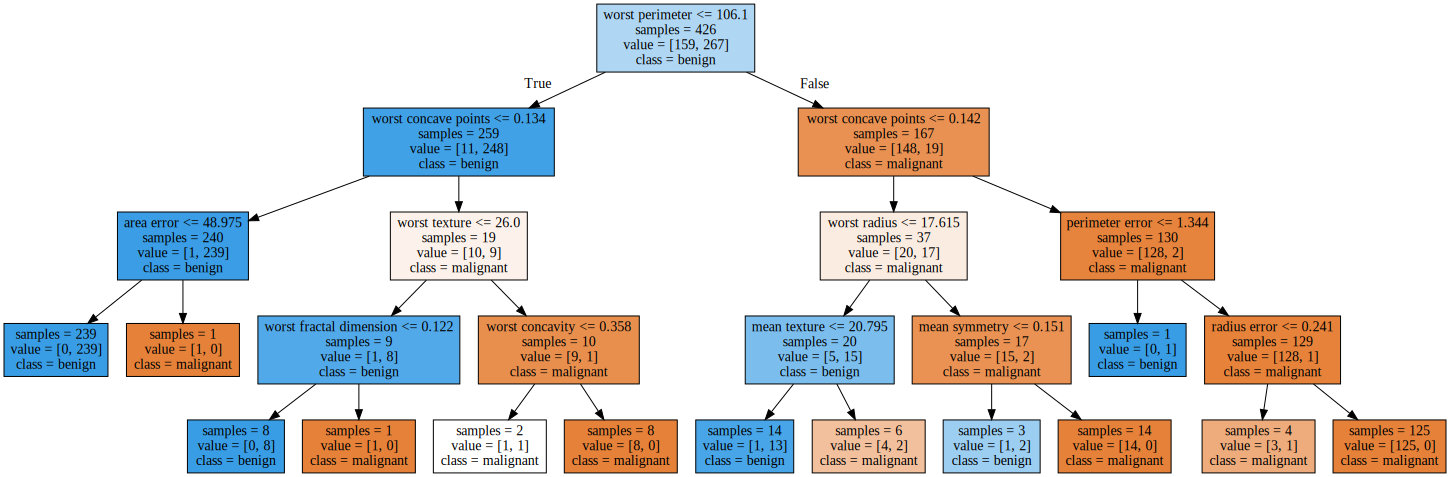

In [6]:
import graphviz
with open('C:/Users/bangsun/Desktop/tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

### 特征重要性

In [7]:
print('Feature importances:\n{}'.format(tree.feature_importances_))
#0表示根本没用到，1表示完美预测值

Feature importances:
[0.         0.01558601 0.         0.         0.         0.
 0.         0.         0.01150064 0.         0.00253726 0.
 0.01023272 0.01043016 0.         0.         0.         0.
 0.         0.         0.03848579 0.03087626 0.75708572 0.
 0.         0.         0.00418952 0.10976588 0.         0.00931004]


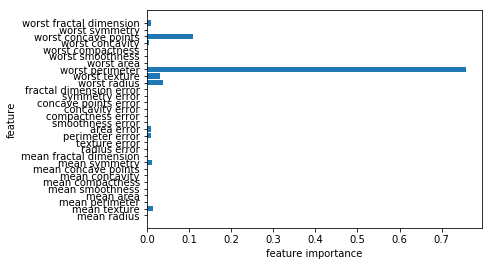

In [8]:
def plot_feature_importtances_cancer(model):
    n_features=cancer['data'].shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer['feature_names'])
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    
plot_feature_importtances_cancer(tree)

Feature importances: [0. 1.]


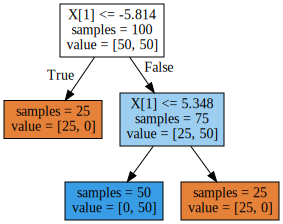

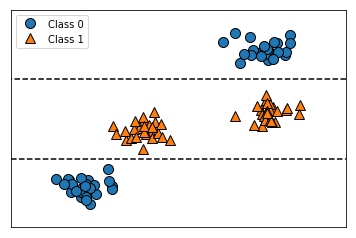

In [9]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

### 优点缺点和参数

In [ ]:
'''
如前所述，控制决策树模型复杂度的参数是预剪枝参数，它在树完全展开之前停止树的构
造。通常来说，选择一种预剪枝策略（设置 max_depth、 max_leaf_nodes 或 min_samples_
leaf）足以防止过拟合。
与前面讨论过的许多算法相比，决策树有两个优点：一是得到的模型很容易可视化，非
专家也很容易理解（至少对于较小的树而言）；二是算法完全不受数据缩放的影响。由于
每个特征被单独处理，而且数据的划分也不依赖于缩放，因此决策树算法不需要特征预处
理，比如归一化或标准化。特别是特征的尺度完全不一样时或者二元特征和连续特征同时
存在时，决策树的效果很好。
决策树的主要缺点在于，即使做了预剪枝，它也经常会过拟合，泛化性能很差。因此，在
大多数应用中，往往使用下面介绍的集成方法来替代单棵决策树
'''